In [1]:
import pandas as pd

installment_payments = pd.read_csv('data/installments_payments.csv')

count    1.360540e+07
mean     8.566373e-01
std      1.035216e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.780000e+02
Name: NUM_INSTALMENT_VERSION, dtype: float64
count    1.360540e+07
mean     1.887090e+01
std      2.666407e+01
min      1.000000e+00
25%      4.000000e+00
50%      8.000000e+00
75%      1.900000e+01
max      2.770000e+02
Name: NUM_INSTALMENT_NUMBER, dtype: float64
count    1.360540e+07
mean    -1.042270e+03
std      8.009463e+02
min     -2.922000e+03
25%     -1.654000e+03
50%     -8.180000e+02
75%     -3.610000e+02
max     -1.000000e+00
Name: DAYS_INSTALMENT, dtype: float64
count    1.360250e+07
mean    -1.051114e+03
std      8.005859e+02
min     -4.921000e+03
25%     -1.662000e+03
50%     -8.270000e+02
75%     -3.700000e+02
max     -1.000000e+00
Name: DAYS_ENTRY_PAYMENT, dtype: float64
count    1.360540e+07
mean     1.705091e+04
std      5.057025e+04
min      0.000000e+00
25%      4.226085e+03
50%      8.884080e

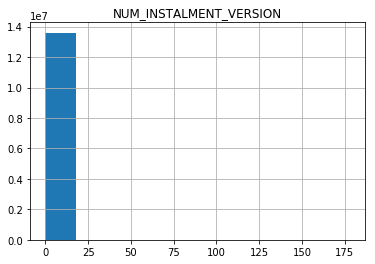

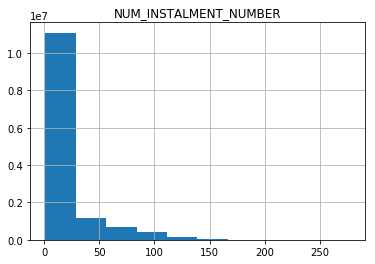

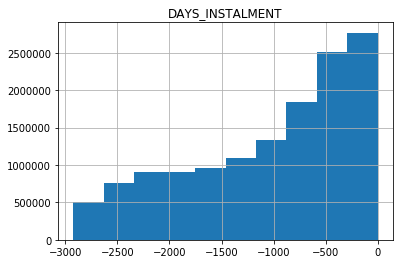

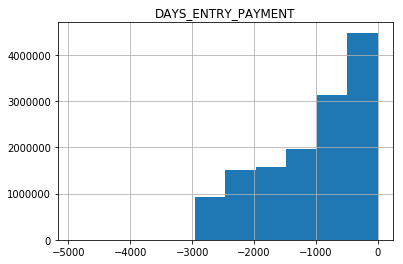

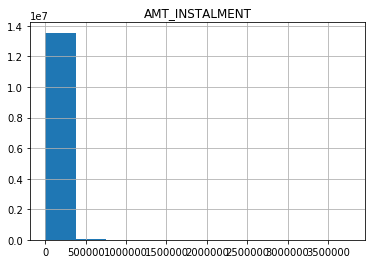

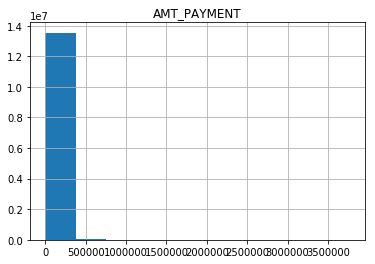

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt

numeric_cols = ['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']

for col in numeric_cols:
        plt.figure()
        col_data = installment_payments[col]
        print(col_data.describe())
        col_data.hist()
        plt.title(col)

In [3]:
installment_payments['DAYS_INSTALLMENT_DIFF'] = installment_payments['DAYS_INSTALMENT'] - installment_payments['DAYS_ENTRY_PAYMENT']
installment_payments['AMT_INSTALLMENT_DIFF'] = installment_payments['AMT_INSTALMENT'] - installment_payments['AMT_PAYMENT']

In [5]:
agg_functions = {
    'SK_ID_CURR': 'count',
    'DAYS_INSTALLMENT_DIFF': ['mean', 'median'],
    'AMT_INSTALLMENT_DIFF': ['mean', 'median']
}

installment_payments_summary = installment_payments.groupby(by='SK_ID_CURR').agg(agg_functions)

In [8]:
flattened_installment_summary = pd.DataFrame()

for col1, col2 in installment_payments_summary.columns:
    flattened_name = col1 + '_' + col2
    flattened_installment_summary[flattened_name] = installment_payments_summary[col1][col2]

flattened_installment_summary.to_csv('data/summary/installment_payments_summary.csv')